In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
data1=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte2.csv')
data_unida=pd.concat([data,data1])
data_unida=data_unida.iloc[:,1:]
data_unida.shape

/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_25075/2738262706.py:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_25075/2738262706.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte2.csv')


(634682, 48)

# **INFORMACIÓN GENERAL DE LOS DATOS**
---

In [6]:
data_unida.shape

(634682, 48)

In [3]:
data_unida.head()

,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,ES,H,35,2015-01-12,N,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,503082,2015-01-28,ES,V,27,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,502996,2015-01-28,ES,V,37,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
3,503053,2015-01-28,ES,H,23,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,1,0
4,503031,2015-01-28,ES,H,44,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0


In [4]:
data_unida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634682 entries, 0 to 317340
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cod_persona            634682 non-null  int64  
 1   mes                    634682 non-null  object 
 2   pais                   634626 non-null  object 
 3   sexo                   634617 non-null  object 
 4   edad                   634682 non-null  object 
 5   fecha1                 634626 non-null  object 
 6   xti_empleado           634626 non-null  object 
 7   xti_nuevo_cliente      634626 non-null  float64
 8   num_antiguedad         634682 non-null  object 
 9   xti_rel                634626 non-null  float64
 10  fec_ult_cli_1t         36 non-null      object 
 11  xti_rel_1mes           629040 non-null  float64
 12  tip_rel_1mes           629040 non-null  object 
 13  indresi                634626 non-null  object 
 14  indext                 634626 non-nu

# **VALORES NULOS**
---

In [5]:
data_unida.isna().sum() #/ len(data_unida)

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
fec_ult_cli_1t           634646
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod

# **ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS**
---

In [193]:
#Primera mitad del dataset
data_unida.iloc[:,:round(data_unida.shape[1]/2)].describe()

,Unnamed: 0,cod_persona,edad,fecha1,num_antiguedad,fec_ult_cli_1t,cod_provincia,imp_renta,mean_engagement
count,625470.000000,6.254700e+05,625470.000000,625470,625470.000000,38,625470.000000,5.254400e+05,625470.000000
mean,160530.425363,7.566827e+05,40.349545,2008-09-20 23:53:59.188451072,81.068870,2015-08-08 06:18:56.842105344,26.613571,1.370771e+05,6.433374
min,0.000000,1.131900e+05,3.000000,1995-01-16 00:00:00,1.000000,2015-07-28 00:00:00,1.000000,4.559550e+03,1.950571
25%,80348.250000,4.028700e+05,24.000000,2003-12-19 00:00:00,24.000000,2015-07-28 00:00:00,15.000000,6.822339e+04,5.117500
50%,160283.000000,6.463520e+05,39.000000,2011-06-29 00:00:00,48.000000,2015-07-30 00:00:00,28.000000,1.015195e+05,6.463518
75%,240839.750000,1.121694e+06,51.000000,2013-08-01 00:00:00,137.000000,2015-08-17 18:00:00,34.000000,1.570141e+05,7.359949
max,322352.000000,1.537800e+06,117.000000,2015-08-31 00:00:00,248.000000,2015-09-24 00:00:00,52.000000,2.889440e+07,11.035174
std,92767.978336,4.095993e+05,17.092215,NaN,65.334409,NaN,12.717699,3.350825e+05,1.313445


In [194]:
#Segunda mitad del dataset
data_unida.iloc[:,round(data_unida.shape[1]/2):]..describe()

,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,...,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,nombre_mes
count,625470,625470,625470,625470,625470,625470,625470,625470,625470,625470,...,625470,625470,625470,625470,625470,625470.0,625470.0,625470,625470,625470
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2.0,2.0,2,2,10
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,September
freq,625120,569632,618312,618918,531146,593930,623662,623976,593820,568714,...,623498,588854,592900,607280,622748,586702.0,583494.0,537268,578970,83430


## Variables numéricas

In [8]:
continuas = []
for c in data_unida.columns:
    t = str(data_unida[c].dtype)
    if ("int" in t or "float" in t):
        continuas.append(c)
continuas

['cod_persona',
 'xti_nuevo_cliente',
 'xti_rel',
 'xti_rel_1mes',
 'tip_dom',
 'cod_provincia',
 'xti_actividad_cliente',
 'imp_renta',
 'mean_engagement',
 'ind_prod1',
 'ind_prod2',
 'ind_prod3',
 'ind_prod4',
 'ind_prod5',
 'ind_prod6',
 'ind_prod7',
 'ind_prod8',
 'ind_prod9',
 'ind_prod10',
 'ind_prod11',
 'ind_prod12',
 'ind_prod13',
 'ind_prod14',
 'ind_prod15',
 'ind_prod16',
 'ind_prod17',
 'ind_prod18',
 'ind_prod19',
 'ind_prod20',
 'ind_prod21',
 'ind_prod22',
 'ind_prod23',
 'ind_prod24',
 'ind_prod25']

Visualizacion de diagramas de cajas

-------------------------- Análisis de la variable:  Unnamed: 0
Porcentaje de nulos;  0.0
Media de la variable:  160530.42536332677
Mediana de la variable:  160283.0
Percentil 25 de la variable:  80348.25
Percentil 75 de la variable:  240839.75


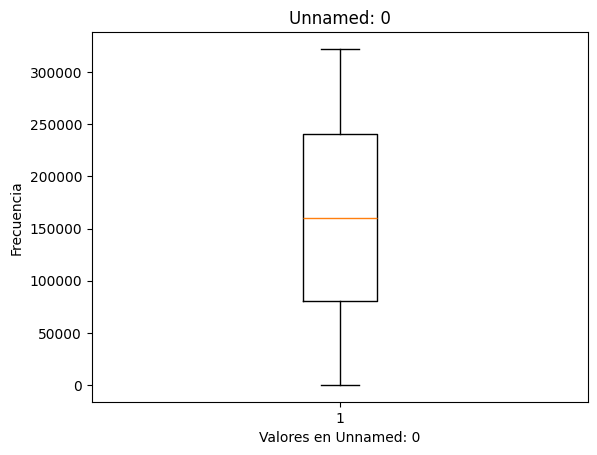

-------------------------- Análisis de la variable:  cod_persona
Porcentaje de nulos;  0.0
Media de la variable:  756682.694728764
Mediana de la variable:  646352.0
Percentil 25 de la variable:  402870.0
Percentil 75 de la variable:  1121694.25


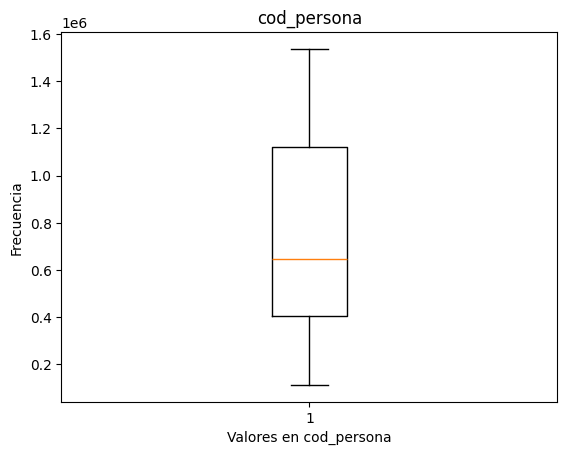

-------------------------- Análisis de la variable:  edad
Porcentaje de nulos;  0.0
Media de la variable:  40.349545142053174
Mediana de la variable:  39.0
Percentil 25 de la variable:  24.0
Percentil 75 de la variable:  51.0


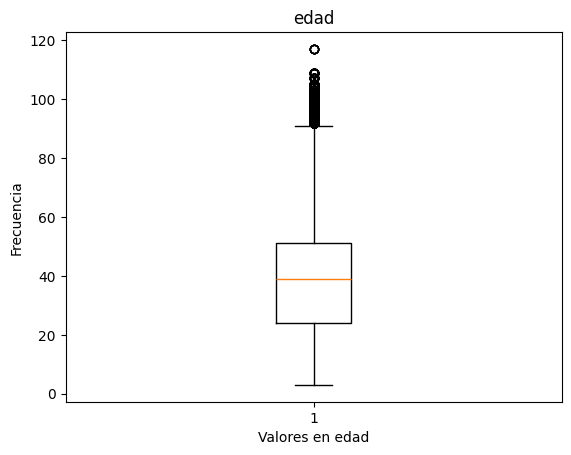

-------------------------- Análisis de la variable:  num_antiguedad
Porcentaje de nulos;  0.0
Media de la variable:  81.06886980990295
Mediana de la variable:  48.0
Percentil 25 de la variable:  24.0
Percentil 75 de la variable:  137.0


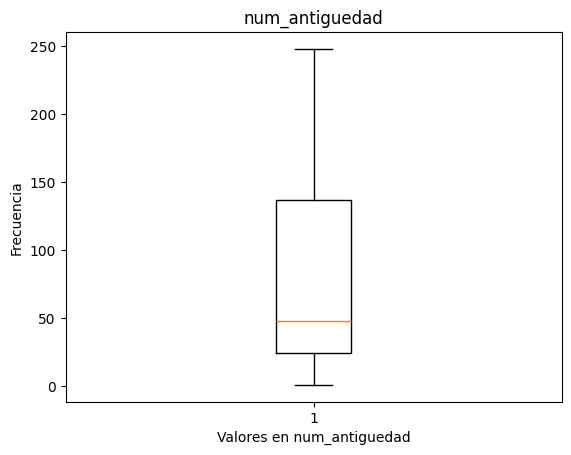

-------------------------- Análisis de la variable:  cod_provincia
Porcentaje de nulos;  0.0
Media de la variable:  26.613570594912627
Mediana de la variable:  28.0
Percentil 25 de la variable:  15.0
Percentil 75 de la variable:  34.0


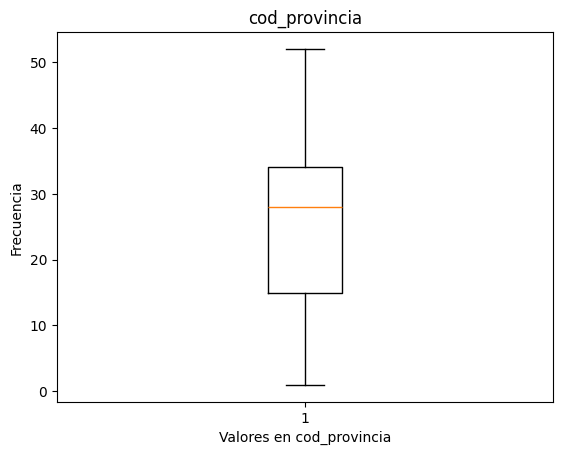

-------------------------- Análisis de la variable:  imp_renta
Porcentaje de nulos;  0.0
Media de la variable:  131390.47204700462
Mediana de la variable:  101519.49
Percentil 25 de la variable:  73923.84
Percentil 75 de la variable:  142857.69


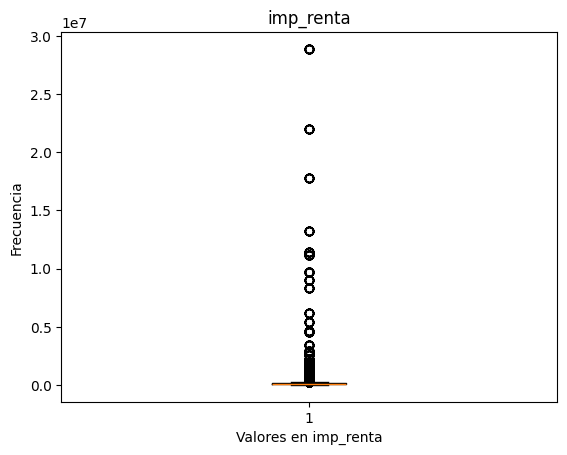

-------------------------- Análisis de la variable:  mean_engagement
Porcentaje de nulos;  0.0
Media de la variable:  6.433374190204995
Mediana de la variable:  6.463518112854217
Percentil 25 de la variable:  5.117499600033625
Percentil 75 de la variable:  7.359948543002247


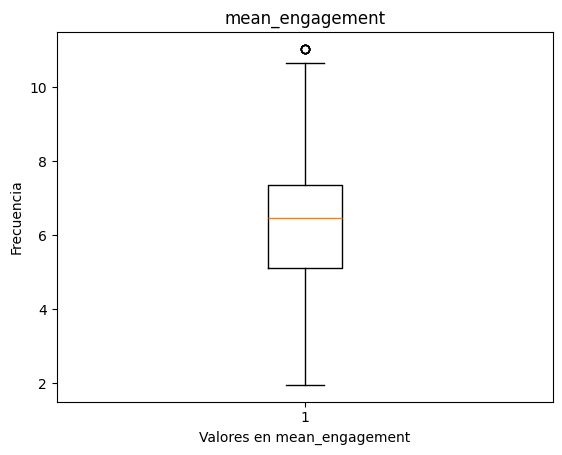

In [197]:
#Número de registros
n= 625470
for col in continuas:
  print("-------------------------- Análisis de la variable: ", col)
  # Cantidad de nulos
  cantidad_nulos = data_unida[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # Medias/medianas percentil
  print("Media de la variable: ", data_unida[col].mean())
  print("Mediana de la variable: ", data_unida[col].median())
  print("Percentil 25 de la variable: ", data_unida[col].quantile(0.25))
  print("Percentil 75 de la variable: ", data_unida[col].quantile(0.75))
  plt.boxplot(data_unida[col])
  plt.xlabel('Valores en ' + col)
  plt.ylabel('Frecuencia')
  plt.title(col)
  plt.show()
  


Visualizacion de las distribuciones

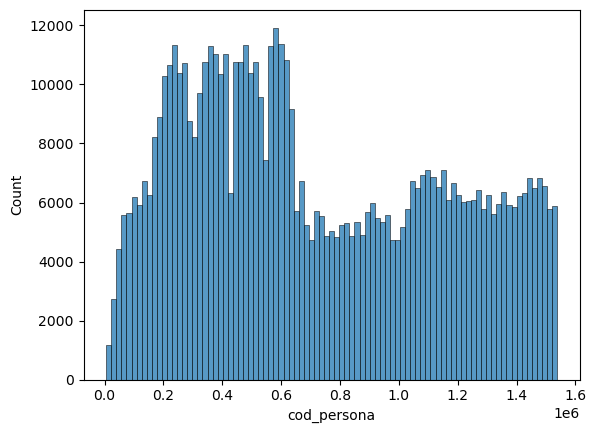

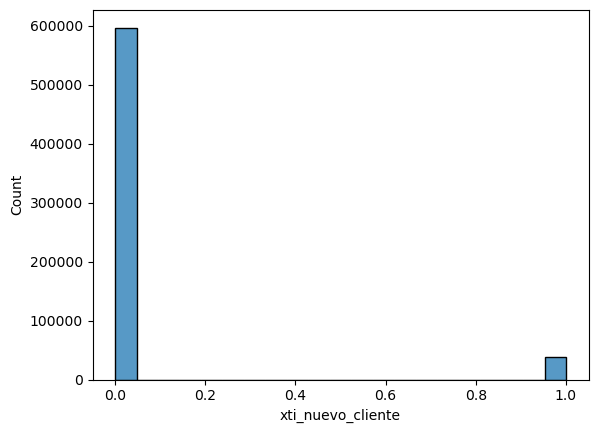

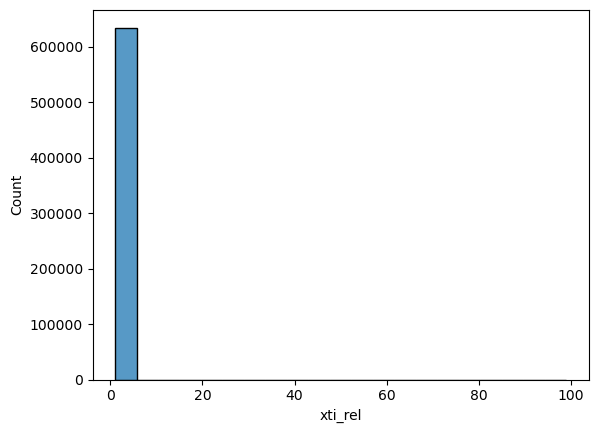

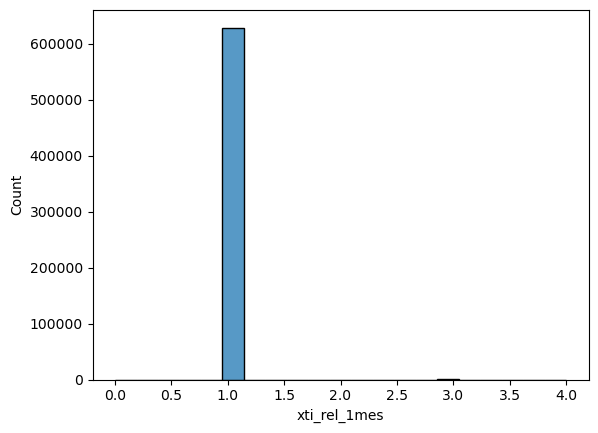

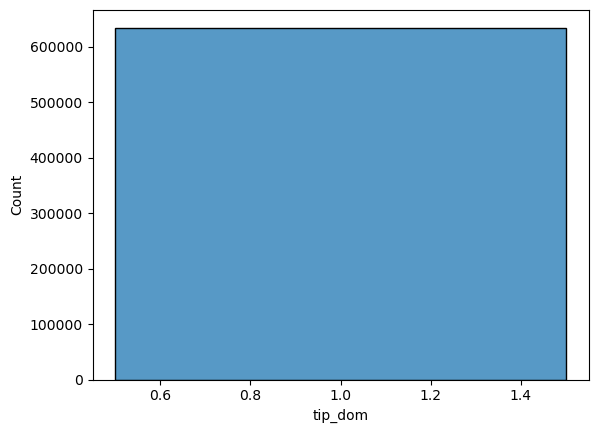

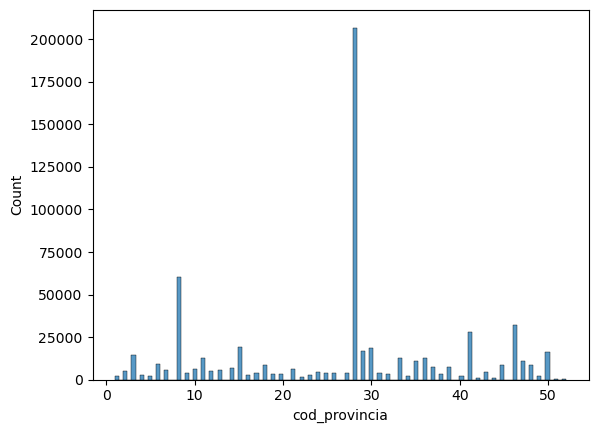

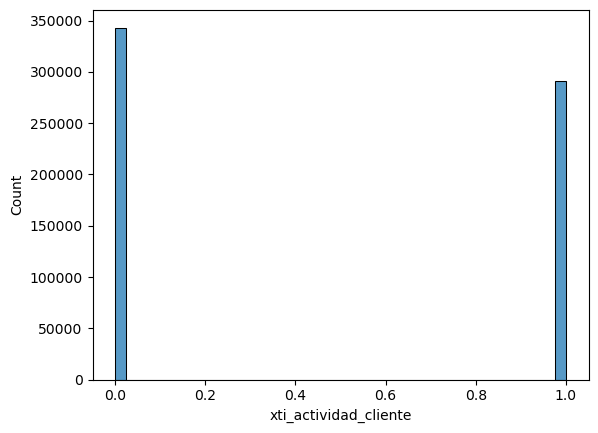

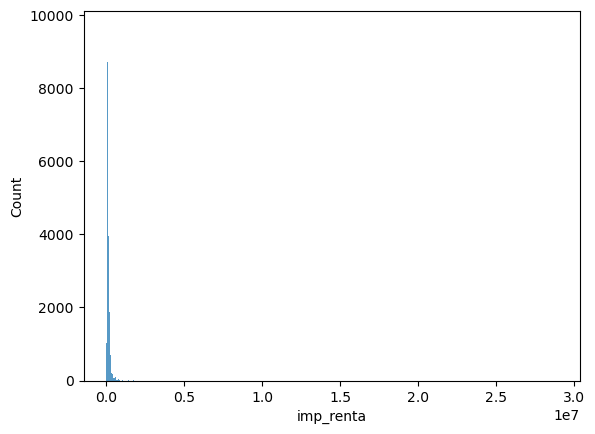

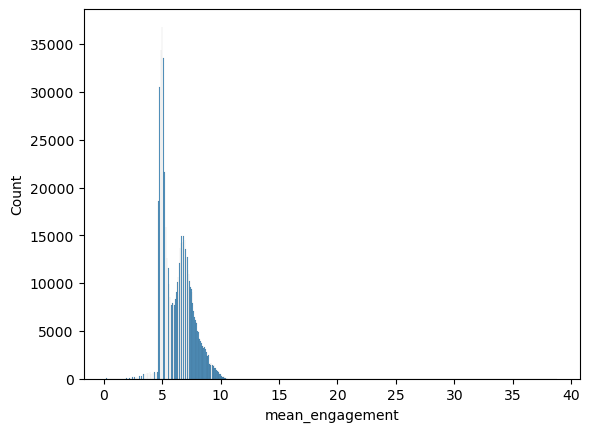

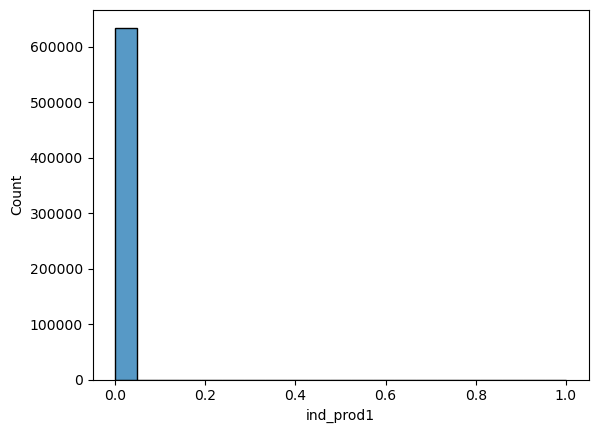

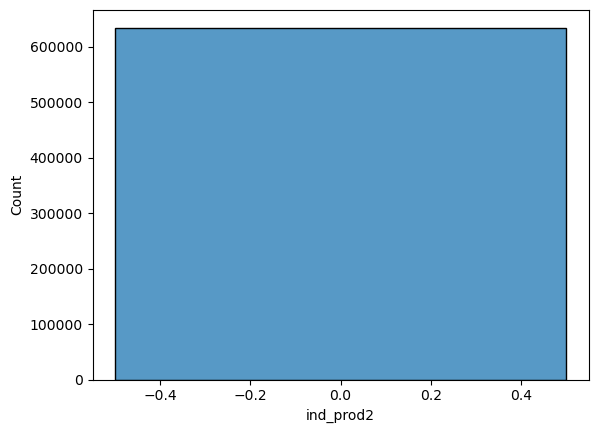

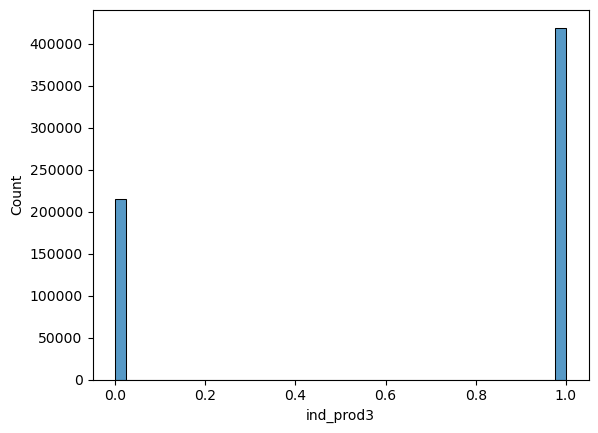

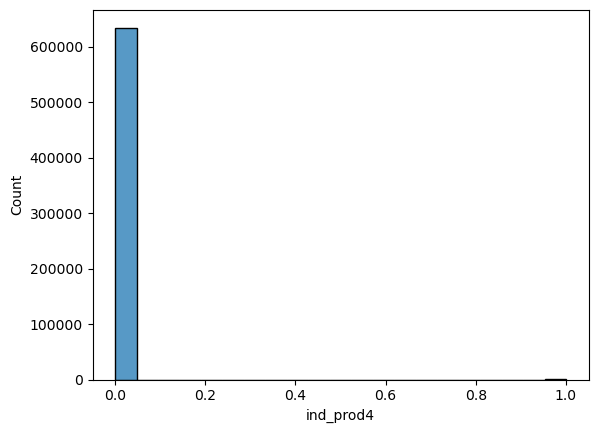

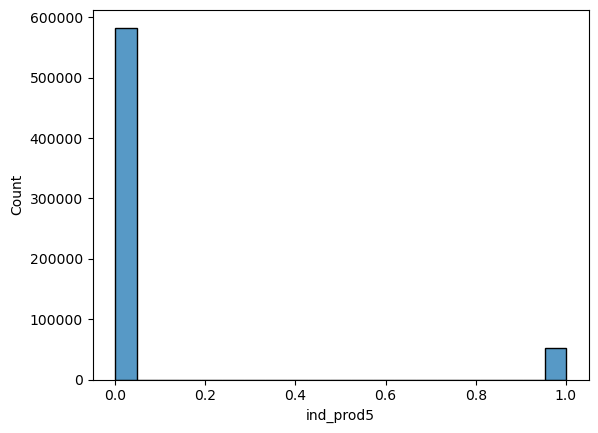

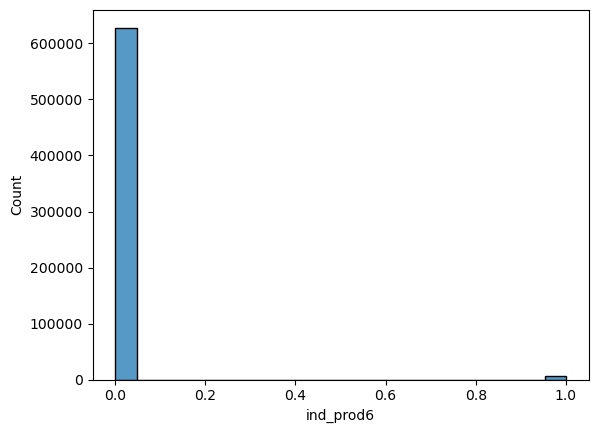

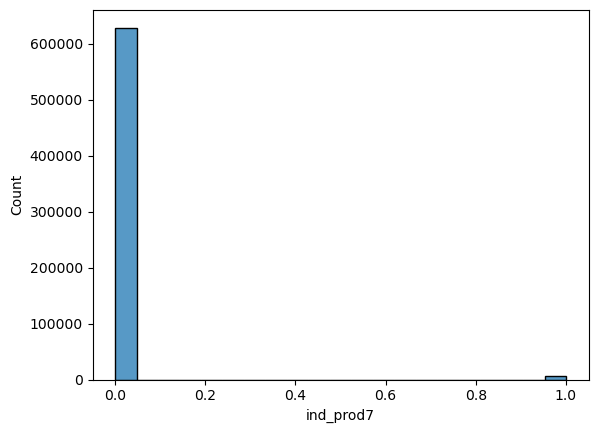

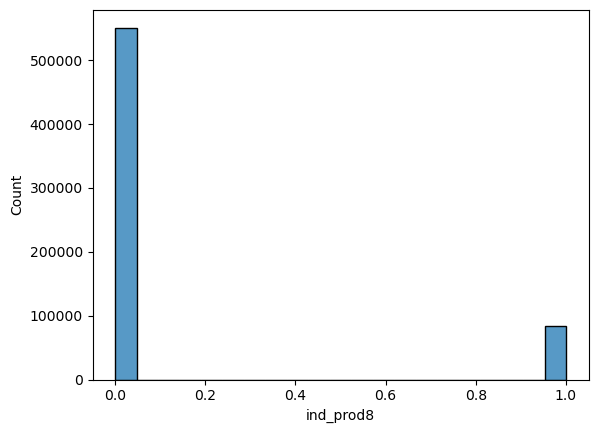

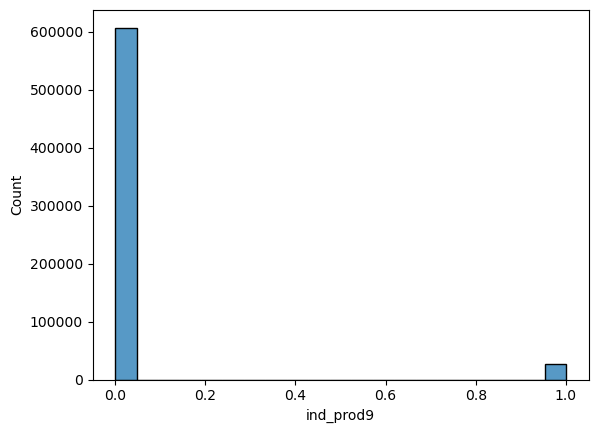

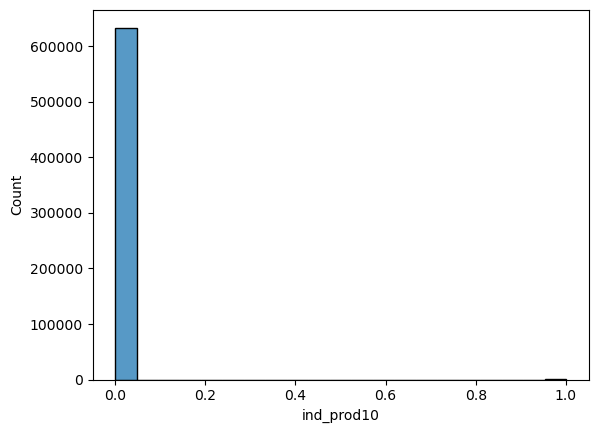

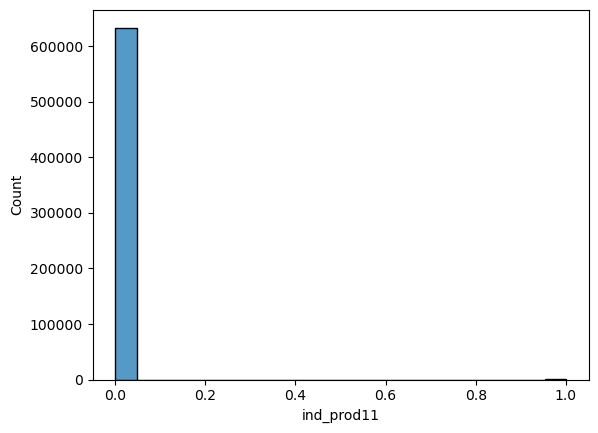

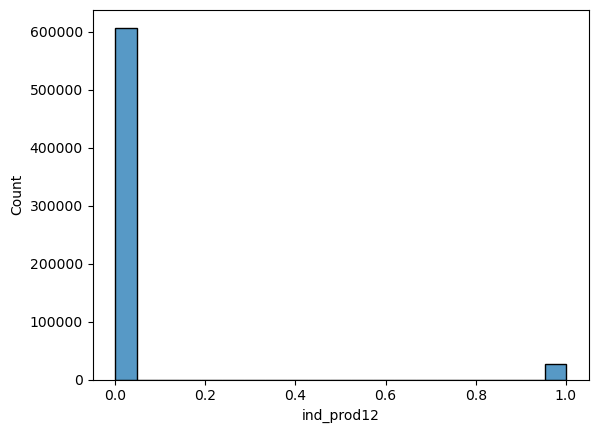

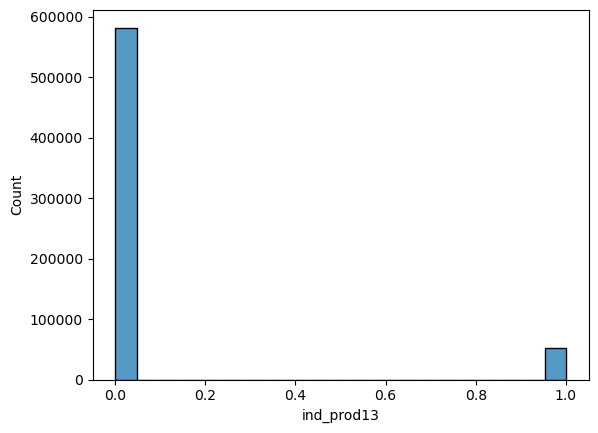

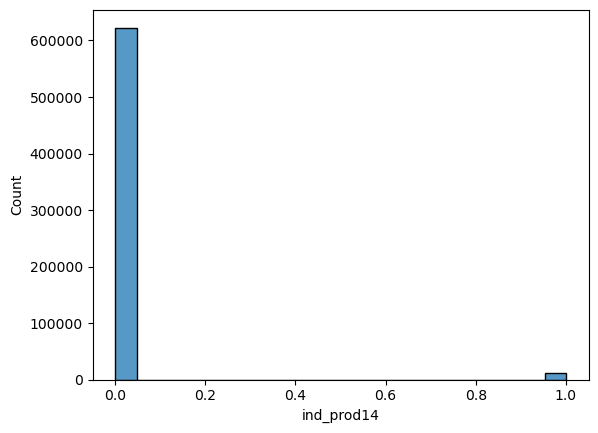

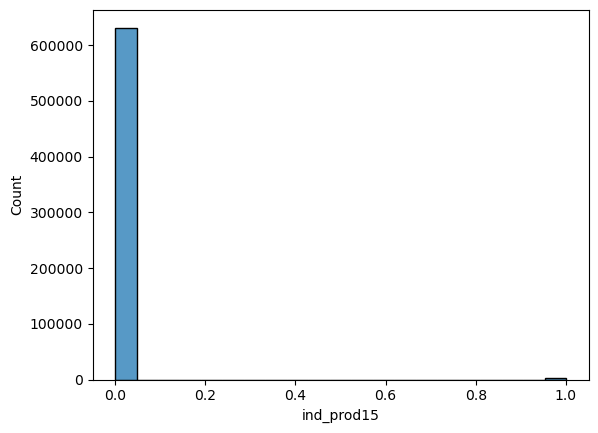

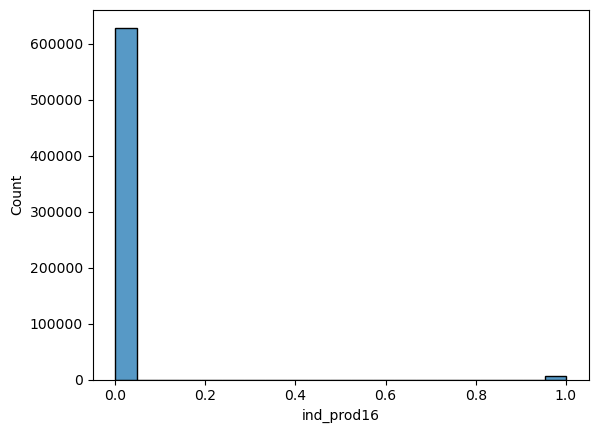

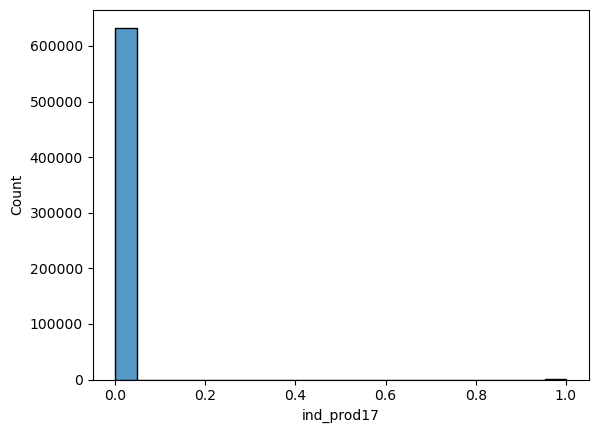

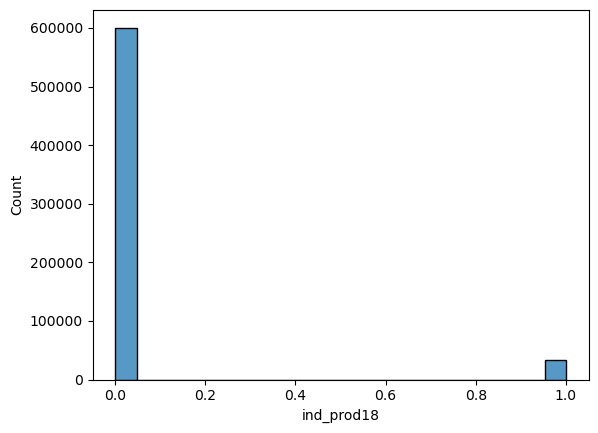

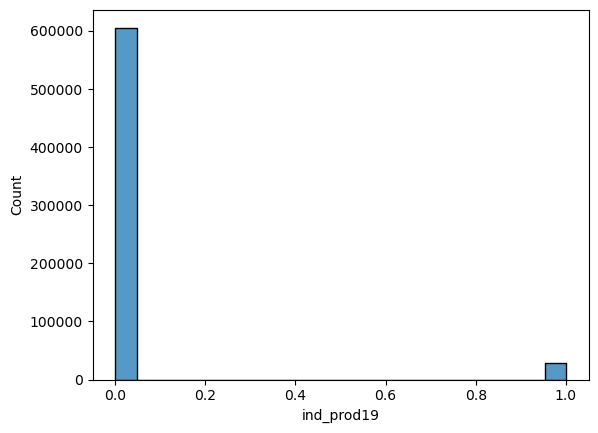

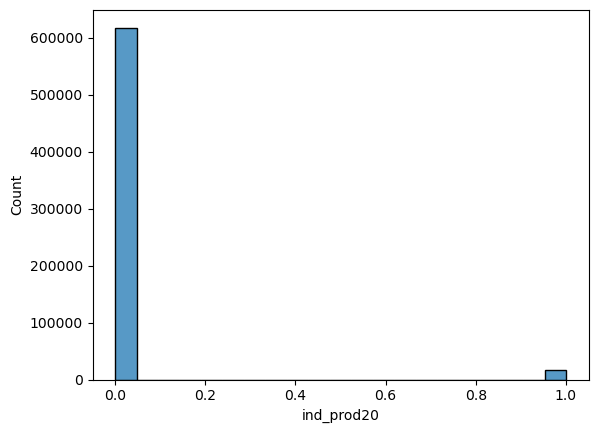

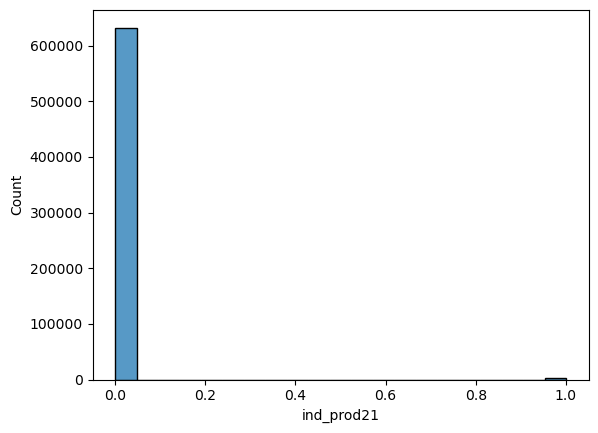

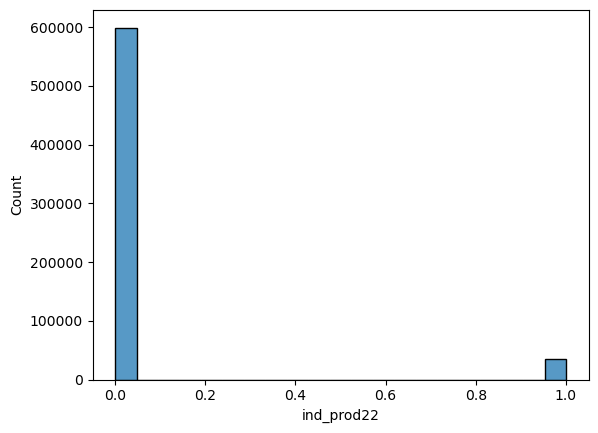

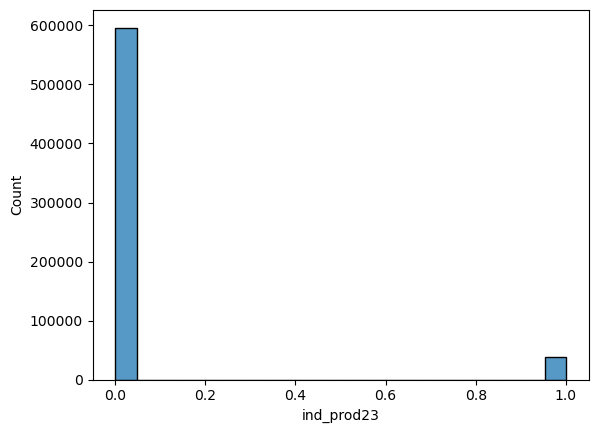

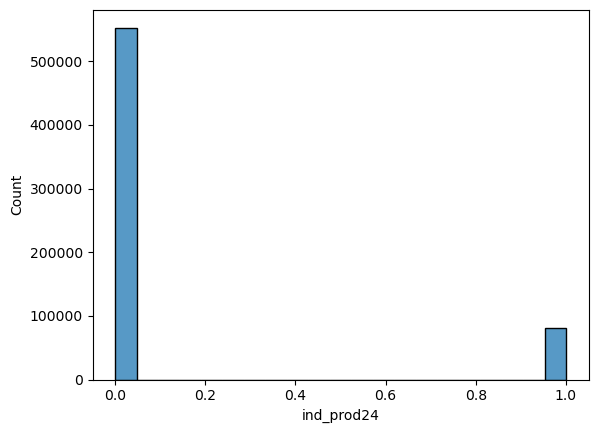

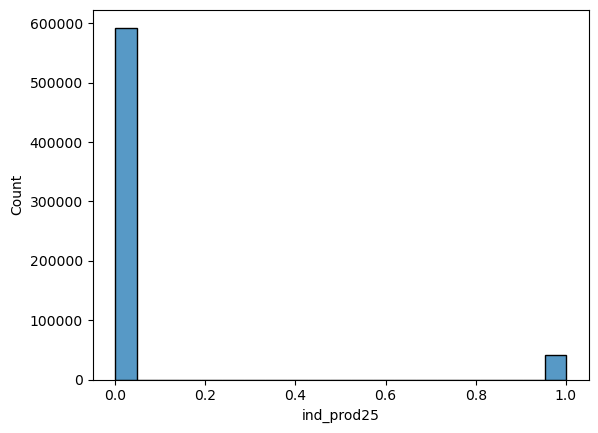

In [10]:
for col in continuas:
    sns.histplot(data_unida[col])
    plt.show()

Distribucion de la columna edad (Inicialmente con tipo de dato objeto)

<Axes: xlabel='edad', ylabel='Count'>

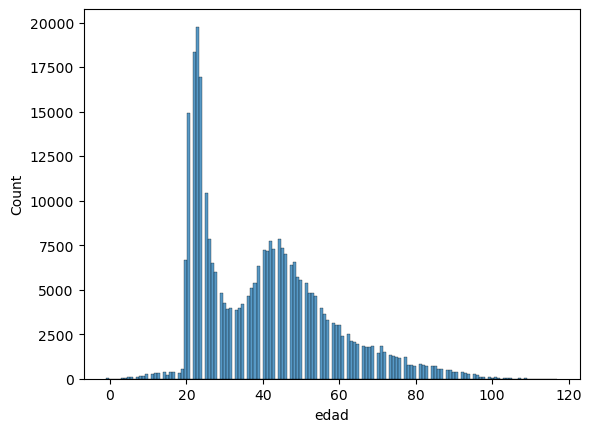

In [11]:
data.replace(' NA', -1, inplace=True)
data.replace('         NA', -1, inplace=True)
data.fillna(-1, inplace=True)
sns.histplot(data['edad'].astype(np.int32))

<Axes: ylabel='edad'>

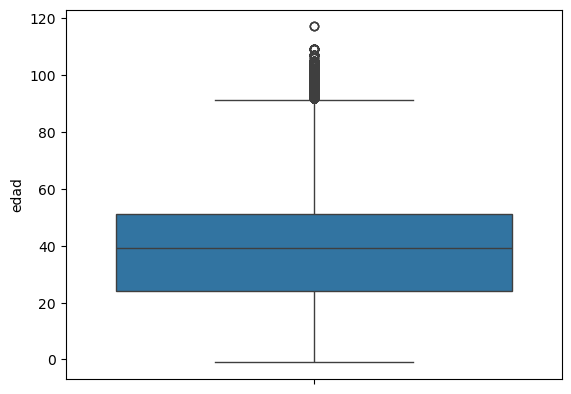

In [12]:
sns.boxplot(data['edad'].astype(np.int32))

# **ANÁLISIS DESCRIPTIVO DE VARIABLES CATEGÓRICAS**
---

In [198]:
data_unida.describe(include=['object','category'])

,pais,sexo,xti_empleado,xti_nuevo_cliente,xti_rel,indresi,indext,des_canal,xti_extra,xti_actividad_cliente,...,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,nombre_mes
count,625470,625470,625470,625470.0,625470.0,625470,625470,625470,625470,625470.0,...,625470,625470,625470,625470,625470,625470.0,625470.0,625470,625470,625470
unique,1,2,4,2.0,2.0,1,2,126,2,2.0,...,2,2,2,2,2,2.0,2.0,2,2,10
top,ES,V,N,0.0,1.0,S,N,KHE,N,0.0,...,0,0,0,0,0,0.0,0.0,0,0,September
freq,625470,343150,624954,612748.0,625432.0,625470,598644,209094,624072,315400.0,...,623498,588854,592900,607280,622748,586702.0,583494.0,537268,578970,83430


## Variables categóricas

In [199]:

categoricas = []
for c in data_unida.columns:
    t = str(data_unida[c].dtype)
    if "object" in t or "category" in t:
        categoricas.append(c)
categoricas

['pais',
 'sexo',
 'xti_empleado',
 'xti_nuevo_cliente',
 'xti_rel',
 'indresi',
 'indext',
 'des_canal',
 'xti_extra',
 'xti_actividad_cliente',
 'id_segmento',
 'ind_prod1',
 'ind_prod2',
 'ind_prod3',
 'ind_prod4',
 'ind_prod5',
 'ind_prod6',
 'ind_prod7',
 'ind_prod8',
 'ind_prod9',
 'ind_prod10',
 'ind_prod11',
 'ind_prod12',
 'ind_prod13',
 'ind_prod14',
 'ind_prod15',
 'ind_prod16',
 'ind_prod17',
 'ind_prod18',
 'ind_prod19',
 'ind_prod20',
 'ind_prod21',
 'ind_prod22',
 'ind_prod23',
 'ind_prod24',
 'ind_prod25',
 'nombre_mes']

In [13]:

#Número de registros
n= 625470
for col in categoricas:
  # Cantidad de nulos
  cantidad_nulos = data_unida[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # 1. Exploración de Frecuencias
  frecuencia_categoria = data_unida[col].value_counts()
  print("Frecuencia de categorías:")
  print(frecuencia_categoria)

  # Gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(8, 5))
  frecuencia_categoria.plot(kind='bar', color='skyblue')
  plt.title(f'Frecuencia de Categorías en {col}')
  plt.xlabel('Categorías')
  plt.ylabel('Frecuencia')
  plt.show()

 

NameError: name 'categoricas' is not defined

# **Limpieza como Análisis**
---

Como paso final para comprender nuestros datos, realizamos una limpieza superficia.